In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
from google.colab import files
files.upload()

df = pd.read_csv('Vendas_Jogos.csv')

Saving Vendas_Jogos.csv to Vendas_Jogos.csv


In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [11]:
df.drop_duplicates(inplace=True) #removendo duplicatas

In [13]:
# Preenchendo valores ausentes com 0 nas colunas de vendas
colunas_vendas = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df[colunas_vendas] = df[colunas_vendas].fillna(0)

In [14]:
# Excluindo registros sem nome ou gênero
df = df.dropna(subset=['Name', 'Genre'])

In [15]:
# Verificando novamente se há valores nulos
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Etapa 4 — Análise Exploratória de Dados (EDA)


In [17]:
#Agrupando por gênero e somando as vendas globais
vendas_por_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)


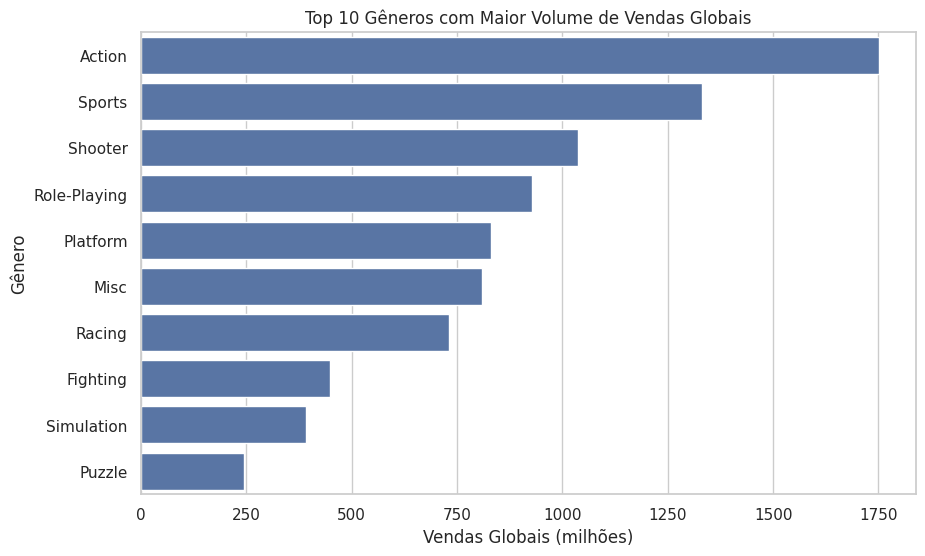

In [19]:
# Gráfico de barras
sns.barplot(x=vendas_por_genero.values, y=vendas_por_genero.index, legend=False)

plt.title('Top 10 Gêneros com Maior Volume de Vendas Globais')
plt.xlabel('Vendas Globais (milhões)')
plt.ylabel('Gênero')
plt.show()

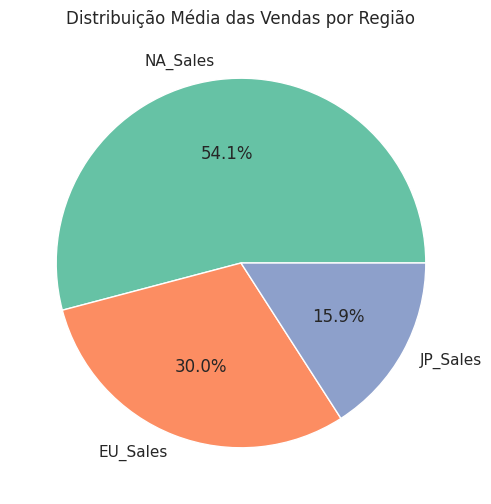

In [20]:
# Cálculo das médias de vendas por região
vendas_regiao = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].mean()

# Gráfico de pizza
vendas_regiao.plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribuição Média das Vendas por Região')
plt.ylabel('')
plt.show()


In [22]:
# Criando o banco de dados SQLite na memória
conn = sqlite3.connect(':memory:')

# Exportando o dataframe para uma tabela SQL
df.to_sql('vendas', conn, index=False, if_exists='replace')

# Consulta SQL: gêneros com maiores vendas globais
consulta_generos = """
SELECT Genre, SUM(Global_Sales) as Total_Vendas
FROM vendas
GROUP BY Genre
ORDER BY Total_Vendas DESC
LIMIT 5;
"""

pd.read_sql_query(consulta_generos, conn)


,Genre,Total_Vendas
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37
3,Role-Playing,927.37
4,Platform,831.37
